Your total score for the memory test is 13 out of 30 
The total answering time in seconds: 98.99656987190247


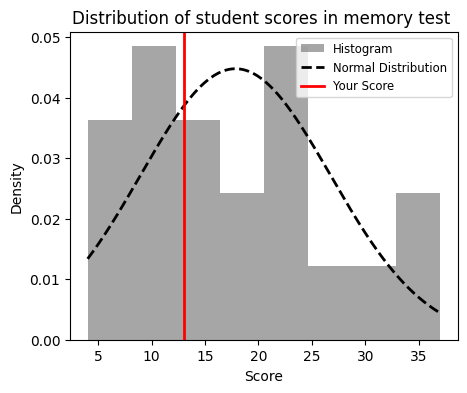

In [1]:
from IPython.display import display, Image, clear_output, HTML
import time
import random
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events
import requests
from bs4 import BeautifulSoup
import json

event_info = {
    'type': '',
    'description': '',
    'time': -1
}
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'
    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
    
def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1
    n_proc = int(max_rate*interval)+1    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            ui_poll(n_proc)
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
            time.sleep(interval)
    return event_info

def register_event(btn):
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return
###########################################################################
memory1 = Image ("Picture1.png", width = 700)
memory2 = Image ("Picture2.png", width = 700)
memory3 = Image ("Picture3.png", width = 700)
memory4 = Image ("Picture4.png", width = 700)
memory5 = Image ("Picture5.png", width = 700)
memory6 = Image ("Picture6.png", width = 700)
memory7 = Image ("Picture7.png", width = 700)
img1 = Image ("Picture6.png", width = 700)
img2 = Image ("Picture7.png", width = 700)



memory_list = [memory1, memory2, memory3, memory4, memory5, memory6, memory7]
#list of questions
question0 = "What is the left shape?"
question1 = "What is the middle shape?"
question2 = "What is the right shape?"
question6 = "What is pink?"
question7 = "What is the bottom middle shape?"
question8 = "What is grey?"
question9 = "What color is pentagon?"
question10 = "What is blue?"
question11 = "What is black?"
question12 = "What color is sad face?"
question13 = "What is yellow?"
question14 = "What color is atom?"
question15 = "What is pink?"
question16 = "What color is right arrow?"
question17 = "What is red?"
question18 = "What is black?"
question19 = "What color is brain?"
question20 = "What is orange?"
question21 = "What is yellow?"
question22 = "What is green?"
question23 = "What is pink?"
question24 = "What color is avocado?"
question25 = "What color is methane?"
question26 = "How many red arrows there are?"
question27 = "How many green arrows there are?"
question28 = "Where does the yellow arrow look?"
question29 = "Where does the pink arrow look?"
question30 = "How many blue arrows there are?"
question31 = "Where does the arrow in here look?"
question32 = "What colour is this arrow?"
#########################################################################
question_list = [question0,question1,question2,"/",

                 question6,question7,question8,question9,question10,"/",

                 question11,question12,question13,question14,question15,question16,
                 question17,"/",
                 
                 question18,question19,question20,question21,question22,question23,
                 question24,question25,"/",
                 
                 question26,question27,question28,question29,question30,"/",
                 
                 question31,"/",
                 
                 question32,"/"]

#list of answers
answer_list = ["triangle","circle","square","/",
              "rhombus","triangle","square","yellow","hexagon","/",
              "pound","blue","butterfly","green","oval","grey","up arrow","/",
              "21","blue","3","boy","ethanol","girl","purple","red","/",
              "2","2","left","right","2","/",
              "down","/",
               "black","/"]

#making buttons
#shapes
btn0 = widgets.Button(description="rhombus")
btn1 = widgets.Button(description="triangle")
btn2 = widgets.Button(description="circle")
btn3 = widgets.Button(description="square")
btn4 = widgets.Button(description="hexagon")
btn5 = widgets.Button(description="pentagon")
#colors
btn6 = widgets.Button(description="yellow")
btn7 = widgets.Button(description="red")
btn8 = widgets.Button(description="blue")
btn9 = widgets.Button(description="pink")
btn10 = widgets.Button(description="green")
btn11 = widgets.Button(description="grey")
btn12 = widgets.Button(description="purple")
btn13 = widgets.Button(description="black")
btn14 = widgets.Button(description="brown")
#numbers
btn15 = widgets.Button(description="1")
btn16 = widgets.Button(description="2")
btn17 = widgets.Button(description="3")
btn18 = widgets.Button(description="4")
#directions
btn19 = widgets.Button(description="up")
btn20 = widgets.Button(description="down")
btn21 = widgets.Button(description="left")
btn22 = widgets.Button(description="right")
#objects
btn23 = widgets.Button(description="pound")
btn24 = widgets.Button(description="happy face")
btn25 = widgets.Button(description="butterfly")
btn26 = widgets.Button(description="oval")
btn27 = widgets.Button(description="up arrow")
btn28 = widgets.Button(description="down arrow")
btn29 =widgets.Button(description="right arrow")
btn30 = widgets.Button(description="atom")
btn31 = widgets.Button(description="sad face")
btn32 = widgets.Button(description="bromine")
btn33 = widgets.Button(description="21")
btn34 = widgets.Button(description="boy")
btn35 = widgets.Button(description="ethanol")
btn36 = widgets.Button(description="girl")
btn37 = widgets.Button(description="brain")
btn38 = widgets.Button(description="methane")
#how buttons work
btn0.on_click(register_event)
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
btn5.on_click(register_event) 
btn6.on_click(register_event) 
btn7.on_click(register_event) 
btn8.on_click(register_event)
btn9.on_click(register_event) 
btn10.on_click(register_event) 
btn11.on_click(register_event) 
btn12.on_click(register_event)
btn13.on_click(register_event) 
btn14.on_click(register_event) 
btn15.on_click(register_event) 
btn16.on_click(register_event) 
btn17.on_click(register_event) 
btn18.on_click(register_event)
btn19.on_click(register_event) 
btn20.on_click(register_event) 
btn21.on_click(register_event) 
btn22.on_click(register_event)
btn23.on_click(register_event) 
btn24.on_click(register_event) 
btn25.on_click(register_event) 
btn26.on_click(register_event)
btn27.on_click(register_event) 
btn28.on_click(register_event) 
btn29.on_click(register_event) 
btn30.on_click(register_event) 
btn31.on_click(register_event) 
btn32.on_click(register_event)
btn33.on_click(register_event) 
btn34.on_click(register_event) 
btn35.on_click(register_event)
btn36.on_click(register_event) 
btn37.on_click(register_event) 
btn38.on_click(register_event) 

s1 = widgets.HBox([btn0, btn1, btn2])
s2 = widgets.HBox([btn3,btn4,btn5])
c1 = widgets.HBox([btn6, btn7, btn8, btn9, btn10])
c2 = widgets.HBox([btn11,btn12, btn13, btn14])
i1_1 = widgets.HBox([btn23, btn24, btn25, btn26, btn27])
i1_2 = widgets.HBox([btn28, btn29, btn30, btn31])
i2_1 = widgets.HBox([btn32, btn33, btn34, btn35])
i2_2 = widgets.HBox([ btn36, btn37, btn38])

shapes = widgets.VBox([s1, s2])
colors = widgets.VBox([c1, c2])
items1 = widgets.VBox([i1_1, i1_2])
items2 = widgets.VBox([i2_1, i2_2])
numbers = widgets.HBox([btn15, btn16, btn17,btn18])
directions = widgets.HBox([btn19, btn20, btn21,btn22])


optionlist=[shapes,shapes,shapes,"/",
            shapes,shapes,shapes,colors,shapes,"/",
            items1,colors,items1,colors,items1, colors, items1,"/",
            items2,colors,numbers,items2,items2,items2,colors,colors,"/",
            numbers,numbers,directions,directions,numbers, "/",
            directions, "/",
            colors, "/"]

data_consent_info = """DATA CONSENT INFORMATION:
Please read:
we wish to record your response data
to an anonymised public data repository.
Your data will be used for educational teaching purposes
practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload."""
print(data_consent_info)
result = input("> ")
if result == "yes":
    print("Thanks for your participation.")
    print("Please contact philip.lewis@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")
else:
    print("No problem we hope you'll enjoy the test.")
    time.sleep(1)
    clear_output()
id_instructions = """
Enter your anonymised ID
To generate an anonymous 4-letter unique user identifier please enter:
- two first letters of your favoutite fruit
- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your favoutite fruit is orange and favourite actor is Adam Sendler
then your unique identifer would be ORAS
"""
print(id_instructions)
user_id = input("> ")
print("User id:", user_id)
clear_output() 
your_age = input("Enter your age:")
clear_output() 
print("Enter your sex:")
btn100 = widgets.Button(description="Male")
btn101 = widgets.Button(description="Female")
btn100.on_click(register_event) 
btn101.on_click(register_event) 
panel = widgets.HBox([btn100, btn101])
display(panel)
result = wait_for_event(timeout=4)
clear_output()
your_sex = result['description']
clear_output() 

def qrunner(sepe,x, correct_answer):
    current_correct = 0 
    if sepe < 33:
        display(memory_list[x])
        time.sleep(10)
        clear_output(wait=False)
        x = x+1
    while question_list[sepe] != "/":
        print(question_list[sepe])
        if question_list[sepe] == question_list[33]:
            display(img1)
        if question_list[sepe] == question_list[35]:
            display(img2)
        display(optionlist[sepe])
        ans=answer_list[sepe]
        result = wait_for_event(timeout=9999)
        clear_output()
            
        if result['description']==ans:                    
            print ("correct")
            time.sleep(1)
            clear_output()      
            sepe=sepe+1 
            correct_answer = correct_answer + 1
            current_correct = current_correct + 1
        else:            
            print("incorrect")
            time.sleep(1)
            clear_output()
            sepe=sepe+1
            
    if question_list[sepe] == "/" and sepe+1 == (len(question_list)):
        myhtml4 = HTML("<h4>The test has finished</h4>")
        display(myhtml4)
    else:
        print(f"You have answered {current_correct} correctly")
        sepe=sepe+1
        time.sleep(2)
        clear_output()
      
    return sepe, x, correct_answer, current_correct

current_time=0
sep=0
corrects=0

print("Welcome to the Memory test")
time.sleep(2)
print("You will be asked color/shape displayed in the image:")
time.sleep(2)
print("Be ready for the first image")
time.sleep(2)
clear_output(wait=False)

tl_start = time.time()
q1=qrunner(sep,current_time,corrects)
correctq1=str(q1[2])

q2=qrunner(q1[0],q1[1],q1[2])
correctq2=str(q2[2])

q3=qrunner(q2[0],q2[1],q2[2])
correctq3=str(q3[2])

q4=qrunner(q3[0],q3[1],q3[2])
correctq4=str(q4[2])

q5=qrunner(q4[0],q4[1],q4[2])
correctq5=str(q5[2])

q6=qrunner(q5[0],q5[1],q5[2])
correctq6=str(q6[2])

q7=qrunner(q6[0],q6[1],q6[2])
correctq7=str(q7[2])

tl_stop = time.time()
tl_time= tl_stop-tl_start -34
data_dict = {
'User id': user_id,
    
'age': your_age,
    
'sex': your_sex,
    
'number of correct answers in test 1': correctq1,

'number of correct answers in test 2':  correctq2,

'number of correct answers in test 3' : correctq3,

'number of correct answers in test 4' : correctq4,

'number of correct answers in test 5' : correctq7,

'total score' : str(q7[2]),

'total time taken' :tl_time

}

form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSfTZ5OSSARKMZuWYzdiYQ2hc3rODvxMDpGRoI7AOcI5NL6gGg/viewform?usp=sf_link'

send_to_google_form(data_dict,form_url)
print(f"Your total score for the memory test is {q7[2]} out of 30 ")
print("The total answering time in seconds:", tl_time)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

score_memory =[4,10,6,11,8,12,19,13,35,29,37,11,16,21,13,22,24,20,21,25]

plt.figure(figsize=(5, 4)) 
plt.hist(score_memory, bins=8, density=True, alpha=0.7, color='grey', label='Histogram')
mean = np.mean(score_memory)
std_dev = np.std(score_memory)

x = np.linspace(min(score_memory), max(score_memory), 1000)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, color='black', linestyle='--', linewidth=2, label='Normal Distribution')

plt.axvline(x=q7[2], color='red', linestyle='-', linewidth=2, label='Your Score')
 

plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of student scores in memory test ') 
plt.legend(fontsize='small') 

plt.show()




